# Notebook destinado a Parte 1 - Resolvendo um Problema Linearmente Separável do Projeto 2 de Redes Neurais 2020.1
## Colaboradores: Jakson Protázio e Nadine Brito

Primeiro importamos as bibliotecas necessárias.

In [16]:
import numpy as np
import random
import matplotlib.pyplot as plt

Em seguida realizamos a leitura do dataset. 

In [17]:
dataset=np.fromfile('data/dataAll.txt')
linhas = len(dataset)//3
colunas=3
dataset=dataset.reshape(linhas, colunas)
print(dataset)

[[-363.7884  244.1423    0.    ]
 [ 328.7572 -256.7658    1.    ]
 [-164.9827  613.2164    0.    ]
 ...
 [ 872.4311  669.1192    1.    ]
 [ 822.6894 -702.6489    1.    ]
 [-140.147   734.0983    0.    ]]


No passo seguinte iremos iniciar o preenchimento do vetor de pesos.

In [18]:
pesos = np.array([random.uniform(-0.5,0.5),random.uniform(-0.5,0.5),random.uniform(-0.5,0.5)])
    
print(pesos)

[0.28290634 0.05368091 0.01579052]


Agora verificamos, através de uma soma ponderada e uma função de ativação, se os pesos precisam de ajuste. Para isso, primeiro, preenchemos um vetor com as entradas do dataset.

In [19]:
entradas = np.array([[-1, dataset[0,0], dataset[0,1]]])
for i in range(1, linhas):
    entradas = np.append(entradas, [[-1, dataset[i,0], dataset[i,1]]], axis=0)
print(entradas)

[[  -1.     -363.7884  244.1423]
 [  -1.      328.7572 -256.7658]
 [  -1.     -164.9827  613.2164]
 ...
 [  -1.      872.4311  669.1192]
 [  -1.      822.6894 -702.6489]
 [  -1.     -140.147   734.0983]]


Agora definimos a função que irá realizar a soma ponderada.

In [20]:
def soma(entradas,pesos):
    return(np.dot(entradas,pesos))

Em seguida definimos a função de ativação. Nesse cenário, a pedido do enunciado, adotou-se a função de ativação degrau com limiar sendo 0.

In [21]:
def ativacao(saida):
    if(saida >= 0):
        return 1
    else:
        return 0  

Definimos também a função de ajuste de pesos.

In [22]:
def ajusta(pesos_atuais, yd, y, x):
    taxa = 0.1
    erro = (yd-y)
    mult = taxa*erro
    result = pesos_atuais + np.dot(mult,x)
    return result


A função verifica, será responsável por fazer a chamada das funções para realizar a soma ponderada, função de ativação e a função de ajuste de pesos.

In [23]:
def verifica(pesos):
    qtde_ajuste = 0
    n = len(entradas)
    
    for i in range(n):
        soma_saida = soma(entradas[i], pesos)
        y = ativacao(soma_saida)
        if(y != dataset[i,2]):
            pesos = ajusta(pesos,dataset[i,2],y,entradas[i])
            qtde_ajuste += 1
            print("Pesos ajustados")
            print(pesos)
    
    return pesos,qtde_ajuste

Para dar início ao aprendizado colocamos a chamada da função verifica() em loop, onde a condição de parada é a convergência, ou seja, quando não há mais erros para os exemplos no conjunto de treinamento.

In [24]:
ajustes = np.array([])

parar = False
epocas = 0

while(parar==False):
    resultado = verifica(pesos)
    pesos = resultado[0]
    ajustes = np.append(ajustes,[resultado[1]])
    indice = len(ajustes)
    if(ajustes[indice-1] == 0):
        parar = True
    epocas += 1

Pesos ajustados
[  0.38290634  16.55195091 -61.30584948]
Pesos ajustados
[  0.28290634  89.34797091 -25.47628948]
Pesos ajustados
[   0.38290634    5.81836091 -124.60211948]
Pesos ajustados
[   0.48290634   55.00522091 -107.97338948]
Pesos ajustados
[  0.38290634 137.60392091 -28.11755948]
Pesos ajustados
[   0.48290634   97.59501091 -106.01024948]
Pesos ajustados
[  0.58290634 147.05583091 -57.11619948]
Pesos ajustados
[   0.68290634  107.50658091 -154.21023948]
Pesos ajustados
[  0.78290634 199.74856091 -67.73766948]
Pesos ajustados
[  0.88290634 187.85145091 -95.63720948]
Pesos ajustados
[   0.98290634  159.64399091 -129.22132948]
Pesos ajustados
[   0.88290634   95.35478091 -197.28595948]
Pesos ajustados
[   0.78290634  148.45910091 -161.50655948]
Pesos ajustados
[   0.88290634  213.45026091 -100.61487948]
Pesos ajustados
[   0.78290634  162.51668091 -164.01484948]
Pesos ajustados
[  0.88290634 249.65144091 -77.32501948]
Pesos ajustados
[   0.98290634  197.73611091 -133.52603948]
P

In [30]:
ajustes = ajustes.astype(int)
total_ajustes = np.sum(ajustes)

print('Ao final da execução do algoritmo, podemos verificar que houve um total de ',total_ajustes,' ajuste(s) realizados nos pesos.\nPara a convergência foram necessárias um total de ',epocas,' épocas. Abaixo pode-se visualizar a quantidade de ajustes \nrealizados em cada época.\n')

for i in range(0,len(ajustes)):
    print('Época ',i+1,' => ', ajustes[i],' ajustes')

Ao final da execução do algoritmo, podemos verificar que houve um total de  27  ajuste(s) realizados nos pesos.
Para a convergência foram necessárias um total de  2  épocas. Abaixo pode-se visualizar a quantidade de ajustes 
realizados em cada época.

Época  1  =>  27  ajustes
Época  2  =>  0  ajustes


Sendo assim foi gerado o gráfico contendo todos os exemplos do conjunto de dados bem como a reta que separa as classses. 

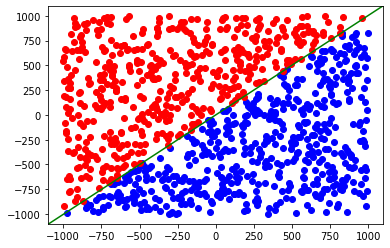

In [32]:
resultado_0x = np.array([])
resultado_0y = np.array([])
resultado_1x = np.array([])
resultado_1y = np.array([])

for i in range (len(dataset)):
    if(dataset[i,2] == 0):
        resultado_0x = np.append(resultado_0x,[dataset[i,0]])
        resultado_0y = np.append(resultado_0y,[dataset[i,1]])
    else:
        resultado_1x = np.append(resultado_1x,[dataset[i,0]])
        resultado_1y = np.append(resultado_1y, [dataset[i,1]])

plt.scatter(resultado_1x,resultado_1y, color='blue')
plt.plot()
        
plt.scatter(resultado_0x,resultado_0y, color='red')
plt.plot()

x2 = (pesos[0]/pesos[2])
x1 = (pesos[0]/pesos[2])/(pesos[1]/pesos[2]) 

plt.axline([x1,0],[0,x2],color='green')
plt.show()


Podemos visualizar que os dados representados pela cor azul são aqueles fizeram com que o neurônio fosse ativado, enquanto os da cor vermelha não obtiveram sucesso na ativação.